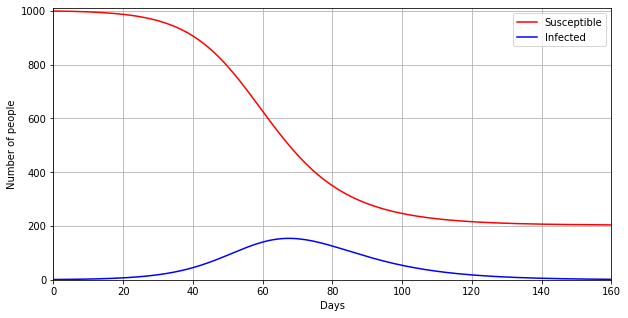

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def SIRmodel(y,t,N,beta,gamma):
    S, I, R = y
    Sdot = -beta * S * I/N
    Idot = beta * S * I/N - gamma * I
    Rdot = gamma * I
    return Sdot, Idot,Rdot
    
def SIR(N, I0 , R0, beta , gamma):
    # N is the total population
    # I0 is the number of infected individuals 
    # R0 is the number of recovered individuals
    # S0 is the initial number susceptible to infection 
    # beta is the contact rate
    # gamma is the recovery rate
    
    t  = np.linspace(0,160,160) # Number of days
    S0 = N - I0 - R0
    y0 = S0, I0, R0
    
    sol = odeint(SIRmodel , y0, t, args =(N, beta, gamma))
    S, I, R = sol.T
    return S, I, R, t
    
def plotSIR(S, I, R, t):
    fig = plt.figure(figsize = ([10,5]))
    plt.plot(t, S , 'r', label = 'Susceptible')
    plt.plot(t, I , 'b', label = 'Infected')
    #plt.plot(t, R/1000 , 'g', label = 'Recovered')
    
    plt.xlabel('Days')
    plt.ylabel('Number of people')
    plt.grid()
    plt.xlim(0,160)
    plt.ylim(0,1010)
    plt.legend()
    plt.show()



S, I , R , t = SIR(1000, 1, 0 , 0.2, 1./10)

plotSIR(S, I , R, t)

In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Network topology
g = nx.erdos_renyi_graph(10, 0.1)

# Model selection
model = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)
pos = nx.circular_layout(g)
nx.draw(g, pos)

In [ ]:
from collections import defaultdict
def SIR(beta, gamma ,rho ):
    '''rho** number
        initial fraction infected. number is int(round(G.order()*rho))'''
    I0 = int(round(G.order()*rho))
    Initial_Infected_nodes = random.sample(G.nodes(), I0)
    Initial_Recovered_nodes = []
    
    I = [len(Initial_Infected_nodes)]
    R = [len(Initial_Recovered_nodes)]
    S = [G.order() - I[0] - R[0]]
    
    t = (int)(1/gamma)
    Node_status = defaultdict(lambda : 'S')
    for node in Initial_Infected_nodes :
        Node_status[node] = 'I'
        if return
        

In [ ]:
tau = float(tau)  #just to avoid integer division problems in python 2.
    gamma = float(gamma)
    
    if initial_infecteds is None:
        if rho is None:
            initial_number = 1
        else:
            initial_number = int(round(G.order()*rho))
        initial_infecteds=random.sample(G.nodes(), initial_number)
    elif G.has_node(initial_infecteds):
        initial_infecteds=[initial_infecteds]
        
    if initial_recovereds is None:
        initial_recovereds = []
        
    I = [len(initial_infecteds)]
    R = [len(initial_recovereds)]
    S = [G.order()-I[0]-R[0]]
    times = [tmin]
    
    transmissions = []
    t = tmin
    
    status = defaultdict(lambda : 'S')
    for node in initial_infecteds:
        status[node] = 'I'
        if return_full_data:
            infection_times[node].append(t)
            transmissions.append((t, None, node))
    for node in initial_recovereds:
        status[node] = 'R'
        if return_full_data:
            recovery_times[node].append(t)

    if recovery_weight is not None:
        infecteds = _ListDict_(weighted=True)
    else:
        infecteds = _ListDict_() #unweighted - code is faster for this case
    if transmission_weight is not None:
        IS_links = _ListDict_(weighted=True)
    else:
        IS_links = _ListDict_()

    for node in initial_infecteds:
        infecteds.update(node, weight_increment = nodeweight(node)) #weight is none if unweighted
        for nbr in G.neighbors(node):  #must have this in a separate loop 
                                       #from assigning status
            if status[nbr] == 'S':
                IS_links.update((node, nbr), weight_increment = edgeweight(node,nbr))
    
    total_recovery_rate = gamma*infecteds.total_weight() #gamma*I_weight_sum
    
    total_transmission_rate = tau*IS_links.total_weight()#IS_weight_sum
        
    total_rate = total_recovery_rate + total_transmission_rate
    delay = random.expovariate(total_rate)
    t += delay
    
    while infecteds and t<tmax:
        if random.random()<total_recovery_rate/total_rate: #recover
            recovering_node = infecteds.random_removal() #does weighted choice and removes it
            status[recovering_node]='R'
            if return_full_data:
                recovery_times[recovering_node].append(t)

            for nbr in G.neighbors(recovering_node):
                if status[nbr] == 'S':
                    IS_links.remove((recovering_node, nbr))
            times.append(t)
            S.append(S[-1])
            I.append(I[-1]-1)
            R.append(R[-1]+1)
        else: #transmit
            transmitter, recipient = IS_links.choose_random() #we don't use remove since that complicates the later removal of edges.
            status[recipient]='I'

            if return_full_data:
                transmissions.append((t, transmitter, recipient))
                infection_times[recipient].append(t)
            infecteds.update(recipient, weight_increment = nodeweight(recipient))

            for nbr in G.neighbors(recipient):
                if status[nbr] == 'S':
                    IS_links.update((recipient, nbr), weight_increment=edgeweight(recipient, nbr))
                elif status[nbr]=='I' and nbr != recipient: #self edge would break this without last test.elif
                    IS_links.remove((nbr, recipient))
                     
            times.append(t)
            S.append(S[-1]-1)
            I.append(I[-1]+1)
            R.append(R[-1])
            
        total_recovery_rate = gamma*infecteds.total_weight()#I_weight_sum
        total_transmission_rate = tau*IS_links.total_weight()#IS_weight_sum
        
                
        total_rate = total_recovery_rate + total_transmission_rate
        if total_rate>0:
            delay = random.expovariate(total_rate)
        else:
            delay = float('Inf')
        t += delay

    if not return_full_data:
        return np.array(times), np.array(S), np.array(I), \
                np.array(R)
    else:
        #print(infection_times)
        #print(recovery_times)
        infection_times = {node: L[0] for node, L in infection_times.items()}
        recovery_times = {node: L[0] for node, L in recovery_times.items()}
        #print(infection_times)
        #print(recovery_times)

        node_history = _transform_to_node_history_(infection_times, recovery_times, tmin, SIR = True)
        if sim_kwargs is None:
            sim_kwargs = {}
        return EoN.Simulation_Investigation(G, node_history, transmissions, possible_statuses = ['S', 'I', 'R'], **sim_kwargs)

Text(0.5, 1.0, 'SIR Model')

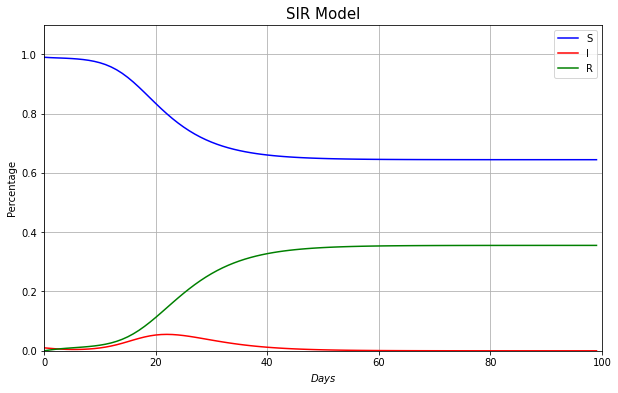

In [10]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.integrate import odeint

n = 500
G = nx.barabasi_albert_graph(n, 3)               # Follows a Power Law
A = np.array(nx.adjacency_matrix(G).todense())   # Adjacency Matrix
beta  = 0.1
gamma = 0.6

t = np.arange(0,50,0.5)
#t = np.arange(0,5,0.05)

# Initial state
idx = np.random.choice(range(n), 1)
i0 = np.zeros((n,))
i0[idx] = 5
z0 = np.concatenate((1-i0,i0,np.zeros((n,))))

# System of ODEs
def sir(z, t, A, n, beta, gamma):
    return np.concatenate((
        -beta * z[0:n] * A.dot(z[n:2*n]),
         beta * z[0:n] * A.dot(z[n:2*n]) - gamma * z[n:2*n],
         gamma * z[n:2*n]))

z = odeint(sir, z0, t, (A, n, beta, gamma))

S = np.average(z[:,0:n], axis =1)
I = np.average(z[:,n:2*n], axis = 1)
R = np.average(z[:,2*n:3*n], axis = 1)
plt.figure(figsize=[10,6])
plt.plot(S,color = 'blue', label = 'S')
plt.plot(I,color = 'red', label = 'I')
plt.plot(R,color = 'green', label = "R")
plt.xlabel('$ Days $')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.xlim(0,100)
plt.ylim(0,1.1)
plt.title('SIR Model', fontsize = 15)

In [6]:
print(z.shape)

(100, 1500)


In [ ]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.integrate import odeint

# Let's start from a complete graph
n = 50
G = nx.watts_strogatz_graph(n, 5, 0.4)

# Get adj. matrix
A = np.array(nx.adjacency_matrix(G).todense())

# Spreading\restoring coefficient
beta, gamma = 0.03, 0.2

# Time domain
t = np.arange(0,5,0.05)

# Initial state
idx = np.random.choice(range(n), 5)
i0 = np.zeros((n,))
i0[idx] = 1
# i0 = np.random.random_integers(0,1,[n,])
z0 = np.concatenate((1-i0,i0))

# System of differential equations..
def sis(z, t, A, n, beta, gamma):
    return np.concatenate((
        -beta * z[0:n] * A.dot(z[n:2*n]) + gamma * z[n:2*n],
         beta * z[0:n] * A.dot(z[n:2*n]) - gamma * z[n:2*n]))
        

# ..Solved
z = odeint(sis, z0, t, (A, n, beta, gamma))

In [ ]:
size = 4
# Create Grid Graph
G = nx.grid_2d_graph(size,size)

# Make node relabelling
f = {}
for v in G.nodes():
    f[v] = v[0]*size+v[1]

G = nx.relabel_nodes(G, f)
nx.draw_spectral(G)

def simulSIS(A, timePeriod, modelParams):
    # init params
    initInfected = modelParams.get('initInfected', None)
    p = modelParams.get('probInfect', 0.5)
    upd = modelParams.get('updateInfection', True)
    maxRecTime = modelParams.get('t2Recover', 2)
    
    # init output
    n = A.shape[0]
    states = np.zeros([n, timePeriod+1]) # 1 = infected, 0 = susceptable
    recTime = np.zeros(n,)
    # set initially infected nodes
    if initInfected is None:
        initInfected = np.random.choice(range(n), n/2)
        states[initInfected,0] = 1
    else:
        states[initInfected,0] = 1
    recTime[initInfected] = maxRecTime + 1
    
    # Start simulation
    for t in xrange(1, timePeriod+1):
        recTime = np.maximum(recTime-1,0)
        states[recTime>0, t] = 1
        states[recTime==0, t] = 0
        
        curInf = np.nonzero(states[:,t])[0]
        states[curInf, t] = 1
        for i in curInf:
            #NN = np.setdiff1d(np.nonzero(A[i,])[0], curInf)
            NN = np.nonzero(A[i,])[0]
            infNN = NN[np.random.rand(len(NN))<p]
            states[infNN, t] = 1
            recTime[infNN] = maxRecTime + 1
            
    return states

In [ ]:
timePeriod = 11
modelParams = {}
modelParams['t2Recover'] = 3
modelParams['initInfected'] = None
modelParams['probInfect'] = 0.1
modelParams['updateInfection'] = True

A = np.array(nx.adjacency_matrix(G))

states = simulSIS(A, timePeriod, modelParams)

In [ ]:
pos = nx.spectral_layout(G)
fig = plt.figure(figsize=(15,10))
for t in xrange(0,timePeriod+1):
    plt.subplot(3,4,t+1)
    nx.draw_spectral(G,
        nodelist=np.nonzero(states[:,t])[0].tolist(),
        node_color = 'r')
    nx.draw_spectral(G,
        nodelist=np.nonzero(1-states[:,t])[0].tolist(),
        node_color = 'b')
    plt.title('t = {0}'.format(t+1))
